In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from kneed import KneeLocator 

In [135]:
data = pd.read_csv('./R/quadrant_city.csv')

## City clustering

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

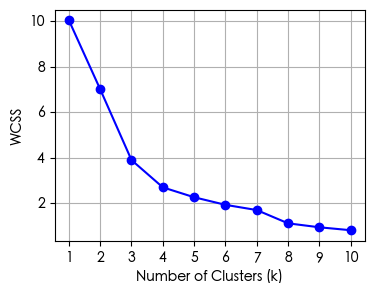

肘部方法最佳 k 值: 4


In [136]:
attention_data = data[['gov_attention', 'pub_attention']].copy()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(attention_data)
scaled_df = pd.DataFrame(scaled_data, columns=['gov_attention_scaled', 'pub_attention_scaled'])

wcss = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(4, 3))
plt.plot(K, wcss, marker='o', color='blue')
# plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(K)
plt.grid()
plt.show()

knee_locator = KneeLocator(K, wcss, curve="convex", direction="decreasing")
optimal_k_elbow = knee_locator.knee
print(f'肘部方法最佳 k 值: {optimal_k_elbow}')

In [137]:
optimal_k = optimal_k_elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)
data['cluster'] = cluster_labels
attention_data['cluster'] = cluster_labels
scaled_df['cluster'] = cluster_labels

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

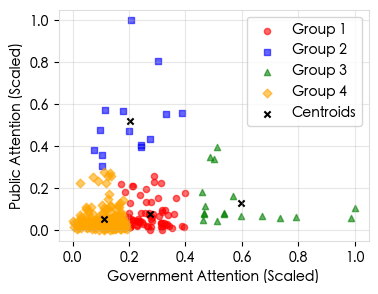

In [138]:
figsize = (4, 3)
colors = ['red', 'blue', 'green', 'orange']
shapes = ['o', 's', '^', 'D'] 

plt.figure(figsize=figsize)
assert optimal_k <= len(shapes), 'Shapes array must have at least optimal_k elements.'

for i in range(optimal_k):
    cluster_data = scaled_df[scaled_df['cluster'] == i]
    plt.scatter(
        cluster_data['gov_attention_scaled'], 
        cluster_data['pub_attention_scaled'],
        c=colors[i], 
        marker=shapes[i % len(shapes)],  
        label=f'Group {i+1}', 
        alpha=0.6,
        s=20, 
    )

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='black', 
    marker='x', 
    s=20, 
    label='Centroids'
)
plt.xlabel('Government Attention (Scaled)', fontsize=10)
plt.ylabel('Public Attention (Scaled)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

ax = plt.gca()  
frame_color = '#ddd'
ax.spines['top'].set_color(frame_color)  
ax.spines['right'].set_color(frame_color) 
ax.spines['left'].set_color(frame_color) 
ax.spines['bottom'].set_color(frame_color) 
plt.savefig('./R/city_clustering.pdf', format='pdf', bbox_inches='tight')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

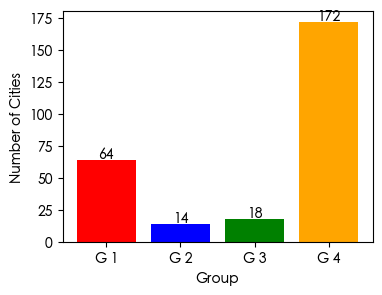

cluster
0     64
1     14
2     18
3    172
Name: count, dtype: int64

In [139]:
plt.figure(figsize=figsize)
cluster_counts = data['cluster'].value_counts().sort_index()
plt.bar([f'G {i+1}' for i in cluster_counts.index], cluster_counts.values, 
        color=colors[:optimal_k])
plt.xlabel('Group')
plt.ylabel('Number of Cities')
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.show()

cluster_counts

In [140]:
def get_attention_type(scaled_data, cluster_labels, cluster_id):
    cluster_mask = (cluster_labels == cluster_id)
    cluster_scaled_data = scaled_data[cluster_mask]
    
    gov_mean_scaled = cluster_scaled_data[:, 0].mean()
    pub_mean_scaled = cluster_scaled_data[:, 1].mean()
    threshold = 0.1
    if gov_mean_scaled - pub_mean_scaled > threshold:
        attention_type = "政府主导型"
    elif pub_mean_scaled - gov_mean_scaled > threshold:
        attention_type = "公众驱动型"
    else:
        attention_type = "均衡发展型"
    
    return attention_type, gov_mean_scaled, pub_mean_scaled

for i in range(optimal_k):
    cluster_data = data[data['cluster'] == i]
    original_attention = attention_data[attention_data['cluster'] == i]
    
    attention_type, gov_scaled_mean, pub_scaled_mean = get_attention_type(
        scaled_data, cluster_labels, i
    )
    print(f'Group {i+1} (包含 {len(cluster_data)} 个城市):')
    print(f'政府关注度(标准化): 平均 {gov_scaled_mean:.4f}')
    print(f'公众关注度(标准化): 平均 {pub_scaled_mean:.4f}')
    print(f'类型: {attention_type}')

Group 1 (包含 64 个城市):
政府关注度(标准化): 平均 0.2733
公众关注度(标准化): 平均 0.0763
类型: 政府主导型
Group 2 (包含 14 个城市):
政府关注度(标准化): 平均 0.2042
公众关注度(标准化): 平均 0.5203
类型: 公众驱动型
Group 3 (包含 18 个城市):
政府关注度(标准化): 平均 0.5981
公众关注度(标准化): 平均 0.1317
类型: 政府主导型
Group 4 (包含 172 个城市):
政府关注度(标准化): 平均 0.1124
公众关注度(标准化): 平均 0.0528
类型: 均衡发展型
